<a href="https://colab.research.google.com/github/tanyadas18/Internship-Project/blob/main/Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project :

<span style='color :MidnightBlue;font-size: 18px;font-family:sans-serif;font-weight:bold'>Problem statement(eg) : Analyze the ramen-ratings dataset and apply Numpy, Pandas and Visualization function</span>
### Example Questions
<span style='color :MidnightBlue;font-size: 15px;font-family:sans-serif;font-weight:bold;font-style:italic'>1. Top 10 Countries in which Ramen is popular based on 5 star rating</span>

<span style='color :MidnightBlue;font-size: 15px;font-family:sans-serif;font-weight:bold;font-style:italic'>2. Top 10 Brands of Ramen which are popular based on 5 star rating </span>

### ..... take such 5 questions



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# To Load the dataset
ramen= pd.read_csv('/content/ramen-ratings.csv')

#Understanding Data

In [ ]:
# Display the first few rows of the dataset
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [ ]:
shape = ramen.shape
print("Rows :",shape[0])
print("Columns :",shape[1])

Rows : 2580
Columns : 7


In [ ]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   41 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


Data Extracted from info() function:


1.   Rows are 2580 and Columns are 7
2.   There are 5 categorical columns and 2 numerical columns
3. Memory consumption: 141.2 KB


In [ ]:
# Summary statistics
ramen.describe()

,Review #,Stars
count,2580.000000,2577.000000
mean,1290.500000,3.654676
std,744.926171,1.015331
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


In [ ]:
ramen.describe(include ="all")

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2577.000000,41
unique,NaN,355,2413,7,38,NaN,38
top,NaN,Nissin,Beef,Pack,Japan,NaN,\n
freq,NaN,381,7,1531,352,NaN,4
mean,1290.500000,NaN,NaN,NaN,NaN,3.654676,NaN
std,744.926171,NaN,NaN,NaN,NaN,1.015331,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.250000,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.750000,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,4.250000,NaN


In [ ]:
ramen['Stars'] = pd.to_numeric(ramen['Stars'], errors='coerce')

In [ ]:
#different types of Ramen styles
ramen['Style'].value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

In [ ]:
#what columns have NaN values
ramen.isna().any()

Review #    False
Brand       False
Variety     False
Style        True
Country     False
Stars        True
Top Ten      True
dtype: bool

In [ ]:
# Sum of NaNs in each column
ramen.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          3
Top Ten     2539
dtype: int64

#Cleaning the data
We see that column "Style" has 2, "Stars" has 3 and "Top Ten" has 2543 NaNs.

In [ ]:
ramen['Top Ten'].fillna(0, inplace=True)
ramen[ramen.isnull().any(axis=1)]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,0
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,0
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,0
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,0
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3.00,0


Handling NaNs in Column "Style"

In [ ]:
#so dropping the two rows with NaN in style
ramen.drop(2152, axis=0,inplace=True)
ramen.drop(2442, axis=0,inplace=True)

Handling NaNs in Column "Stars"

In [ ]:
ramen_with_Nan = ramen[ramen.isnull().any(axis=1)]
ramen_with_Nan

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,0
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,0
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,0


In [ ]:
for i in ramen_with_Nan.index:
    subRamen = ramen.loc[(ramen['Brand']==ramen_with_Nan.loc[i,'Brand']) &
(ramen['Country']==ramen_with_Nan.loc[i,'Country'])]
    mean = subRamen['Stars'].mean()
    ramen.loc[i,'Stars'] = round(mean,2)

In [ ]:
ramen.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Top Ten     0
dtype: int64

In [ ]:
ramen[ramen['Top Ten'] != 0]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9


In [ ]:
# we can we still '\n' in our data
# considering it as missing value let's fill it with 0 temporarily
top_ten_with_n=ramen[ramen['Top Ten'] == '\n']
for i in top_ten_with_n.index:
    ramen.loc[i,'Top Ten']=0

In [ ]:
#creating seperate columns for each year
#and fill with NaN
years=['2012','2013','2014','2015','2016']
for y in years:
    ramen[y+'_rank']=np.nan

In [ ]:
for year in years:
    for index, row in ramen.iterrows():
        rank = row['Top Ten']
        if str(year) in str(rank):
            rank_number = ''.join([char for char in str(rank) if char.isdigit()])
            ramen.loc[index, f'{year}_rank'] = int(rank_number)

ramen.drop('Top Ten', axis=1, inplace=True)

In [ ]:
#it very clean that no rank is equal to 0 rank
ramen.fillna(0, inplace=True)
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0.0,0.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0.0,0.0,0.0,0.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0.0,0.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0.0,0.0,0.0,0.0,0.0


In [ ]:
ramen.isna().sum()

Review #     0
Brand        0
Variety      0
Style        0
Country      0
Stars        0
2012_rank    0
2013_rank    0
2014_rank    0
2015_rank    0
2016_rank    0
dtype: int64

In [ ]:
ramen["2012_rank"].value_counts()

0.0         2569
201210.0       1
20127.0        1
20125.0        1
20123.0        1
20126.0        1
20129.0        1
20121.0        1
20122.0        1
20124.0        1
Name: 2012_rank, dtype: int64

In [ ]:
ramen["2013_rank"].value_counts()

0.0         2571
201310.0       1
20131.0        1
20132.0        1
20134.0        1
20139.0        1
20133.0        1
20136.0        1
Name: 2013_rank, dtype: int64

In [ ]:
ramen["2014_rank"].value_counts()

0.0         2570
20147.0        1
20144.0        1
20149.0        1
201410.0       1
20148.0        1
20145.0        1
20146.0        1
20141.0        1
Name: 2014_rank, dtype: int64

In [ ]:
ramen["2015_rank"].value_counts()

0.0         2571
201510.0       1
20157.0        1
20154.0        1
20159.0        1
20156.0        1
20151.0        1
20158.0        1
Name: 2015_rank, dtype: int64

In [ ]:
ramen["2016_rank"].value_counts()

0.0         2572
201610.0       1
20161.0        1
20168.0        1
20165.0        1
20169.0        1
20167.0        1
Name: 2016_rank, dtype: int64

#Analysis

#Q1) What is the popularity of ramens across the countries?

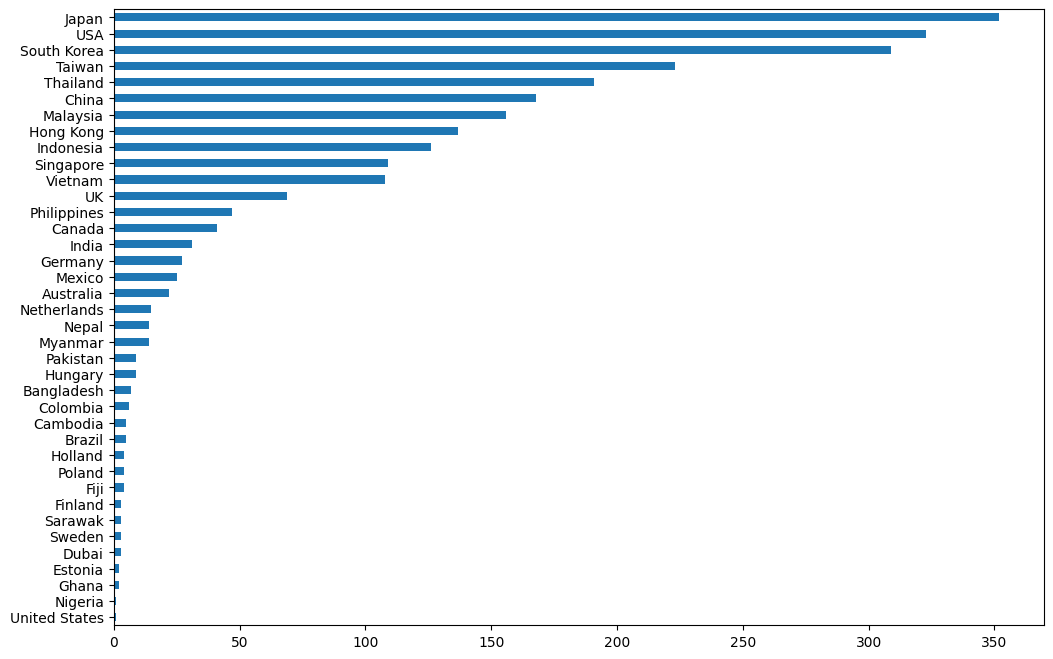

In [ ]:
v = ramen.Country.value_counts()
v=v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
v.plot(kind='barh')
plt.show()

CONCLUSION : Ramen is very popular and highly preferred in Asian countries like Japan,China,South korea etc. Exceptions are USA and UK. We can say that migration of people from Asian countries to USA and UK is high and that has resulted in high Ramen Consumption in those 2 countries.

#Q2) Number of varities in each brand?

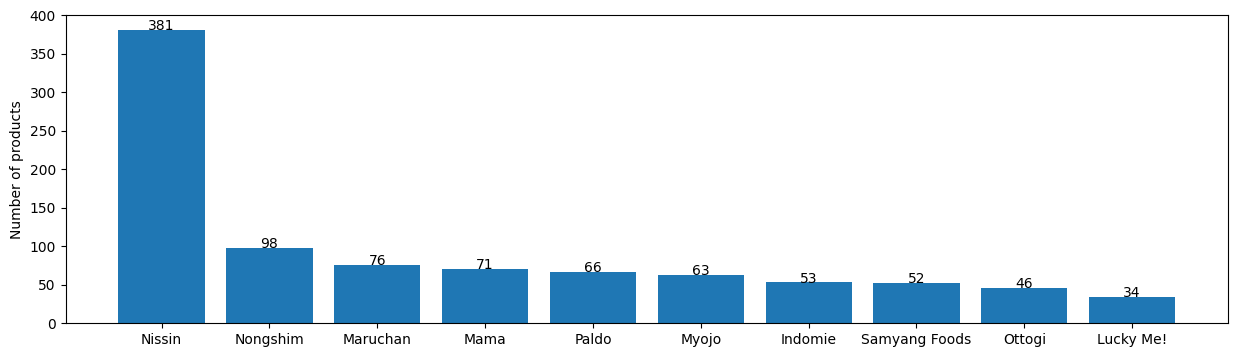

In [ ]:
brands_name = ramen['Brand'].value_counts().head(10).index
brand_size = ramen['Brand'].value_counts().head(10).values

plt.figure(figsize=(15, 4))
plt.bar(brands_name, brand_size)
plt.ylabel('Number of products')

for i, v in enumerate(brand_size):
    plt.text(i, v + 0.2, str(v), ha='center')

plt.show()

CONCLUSION : We see "Nissin" brand to be having the highest number of varities followed by "Nongshim" and "Maruchan" .

#Q3) Most prefered Ramen style

In [ ]:
style=ramen.Style.value_counts()
style

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64

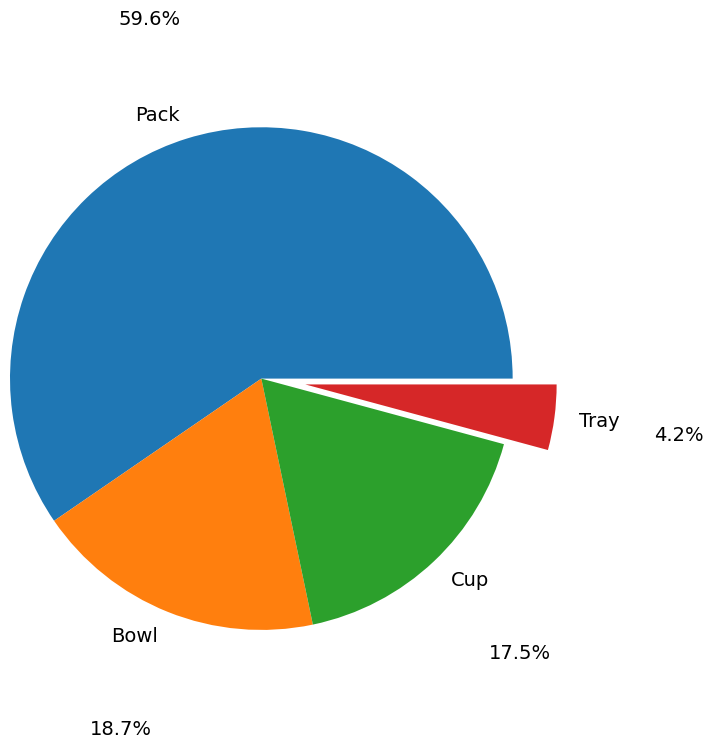

In [ ]:
plt.pie(style[0:4],pctdistance=1.5,autopct="%2.01f%%",radius=1.7,labels=['Pack','Bowl','Cup','Tray'],
        explode=[0,0,0,0.3],
       textprops={'fontsize': 14})
plt.show()

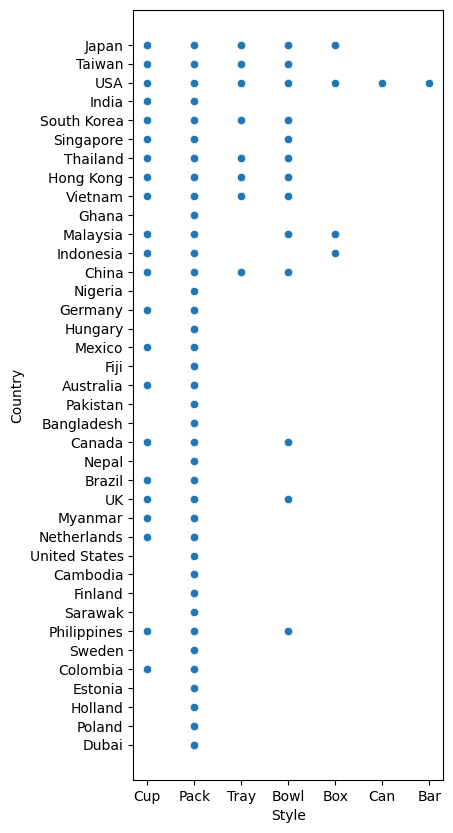

In [ ]:
plt.figure(figsize=(4, 10))
sns.scatterplot(data=ramen, y='Country', x='Style')
plt.show()

CONCLUSION : "Pack" Style is most preferred with 59.6% and followed by "Bowl" and "Cup"(~18% each)

#Q4) What is the density distribution for the "Stars" of Ramen?

<ipython-input-69-645abb4bbb6a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ramen['Stars'],hist=True,kde=True,bins=5)


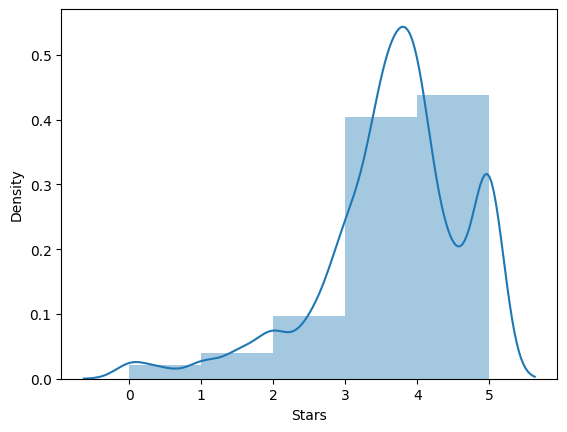

In [ ]:
sns.distplot(ramen['Stars'],hist=True,kde=True,bins=5)
plt.show()

CONCLUSION : The plot of density of "Stars" shows that it is "Left Skewed".

#Q5) What are the top 3 consumers of Ramen? (Countrywise)

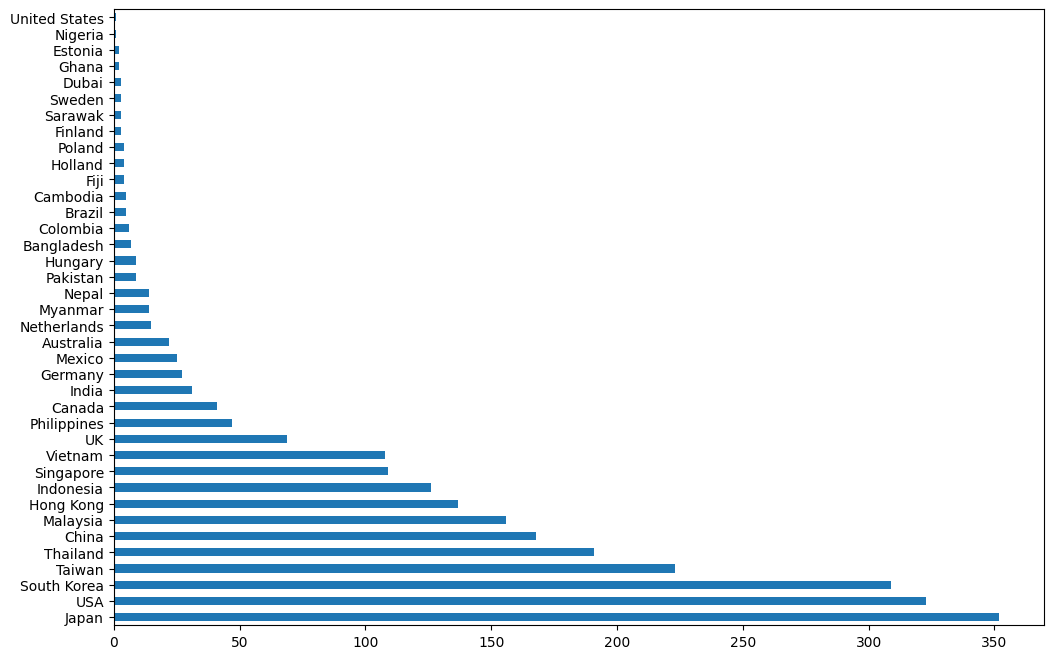

In [ ]:
ramen['Country'].value_counts().plot(kind='barh', figsize=(12, 8))
plt.show()

#Q6) Top 3 most preferred brands in Japan, USA and South Korea?

<ipython-input-72-b9907726af46>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=x_jp.index, y=x_jp.values, palette="Paired")
<ipython-input-72-b9907726af46>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=x_usa.index, y=x_usa.values, palette="hls")
<ipython-input-72-b9907726af46>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x=x_sk.index, y=x_sk.values, palette="Paired")


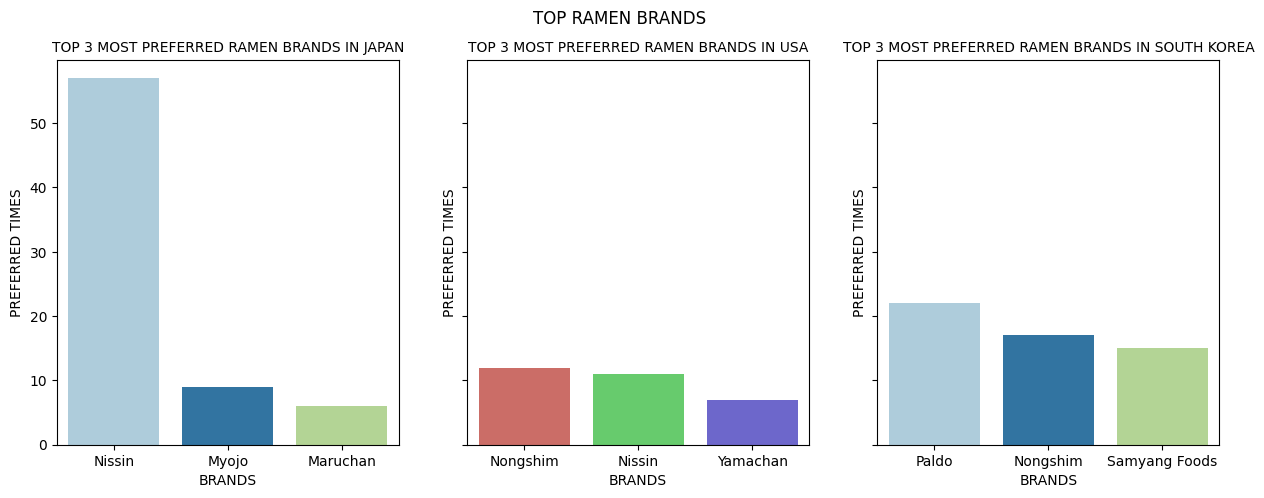

In [ ]:
japan = ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Stars'] >= 4.5)]
usa = ramen.loc[(ramen['Country'] == 'USA') & (ramen['Stars'] >= 4.5)]
south_korea = ramen.loc[(ramen['Country'] == 'South Korea') & (ramen['Stars'] >= 4.5)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# TITLE
fig.suptitle('TOP RAMEN BRANDS')
axes[0].set_title('TOP 3 MOST PREFERRED RAMEN BRANDS IN JAPAN', fontsize=10)
axes[1].set_title('TOP 3 MOST PREFERRED RAMEN BRANDS IN USA', fontsize=10)
axes[2].set_title('TOP 3 MOST PREFERRED RAMEN BRANDS IN SOUTH KOREA', fontsize=10)
axes[0].set_ylabel('PREFERRED TIMES', fontsize=10)
axes[0].set_xlabel('BRANDS', fontsize=10)
axes[1].set_ylabel('PREFERRED TIMES', fontsize=10)
axes[1].set_xlabel('BRANDS', fontsize=10)
axes[2].set_ylabel('PREFERRED TIMES', fontsize=10)
axes[2].set_xlabel('BRANDS', fontsize=10)

# JAPAN
x_jp = japan['Brand'].value_counts().head(3)
sns.barplot(ax=axes[0], x=x_jp.index, y=x_jp.values, palette="Paired")

# USA
x_usa = usa['Brand'].value_counts().head(3)
sns.barplot(ax=axes[1], x=x_usa.index, y=x_usa.values, palette="hls")

# SOUTH KOREA
x_sk = south_korea['Brand'].value_counts().head(3)
sns.barplot(ax=axes[2], x=x_sk.index, y=x_sk.values, palette="Paired")

plt.show()

#Q7) What is Star Rating Analysis in Japan

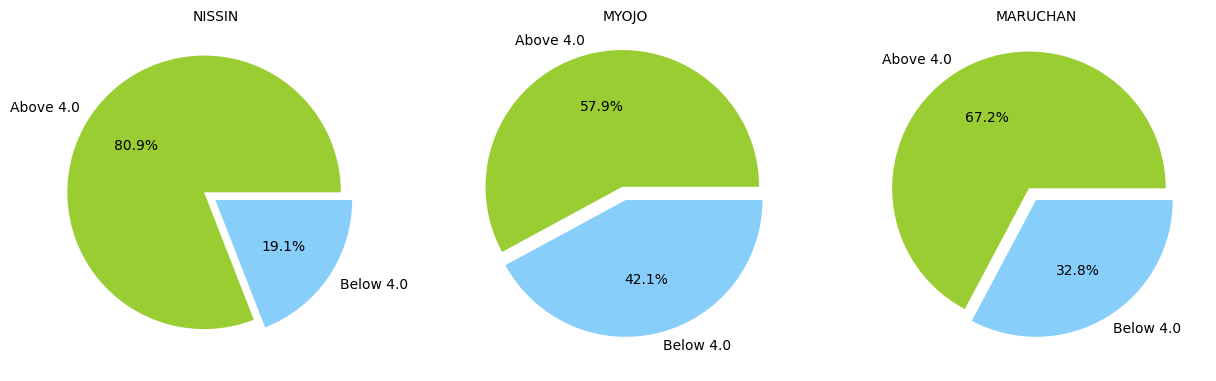

<ipython-input-74-12b5b83e45bc>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0],x="Stars", data=japan_b1, palette="muted")
<ipython-input-74-12b5b83e45bc>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1],x="Stars", data=japan_b2, palette="muted")
<ipython-input-74-12b5b83e45bc>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2],x="Stars", data=japan_b3, palette="muted")


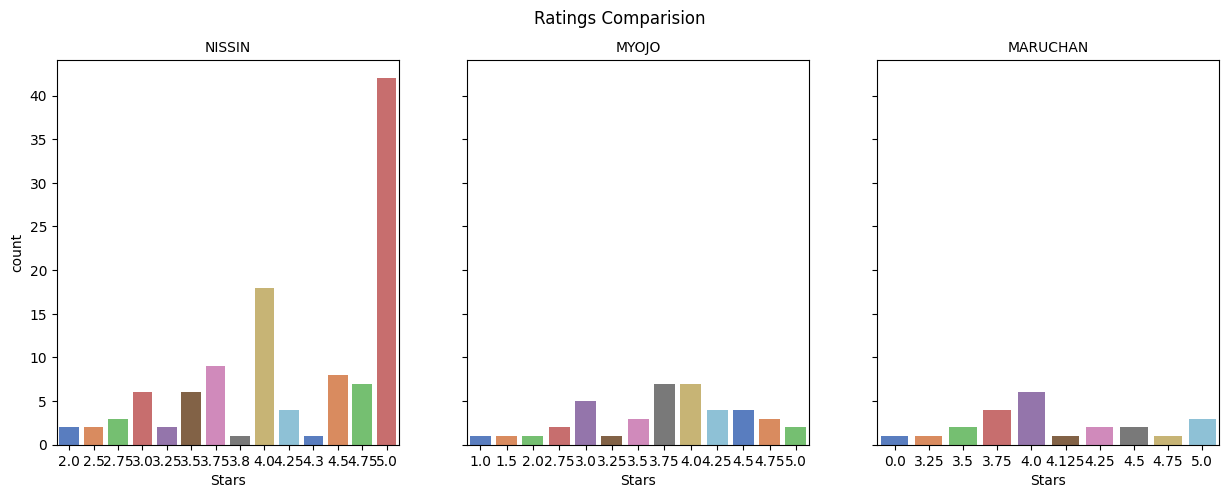

In [ ]:
# NISSIN
jn1=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Stars'] >= 4)& (ramen['Brand']=='Nissin')]
jn2=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Stars'] < 4)& (ramen['Brand']=='Nissin')]
totjnp=jn1['Review #'].sum()
totjnn=jn2['Review #'].sum()
rev1 = totjnp,totjnn

# MYOJO
jmy1=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Stars'] >= 4)& (ramen['Brand']=='Myojo')]
jmy2=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Stars'] < 4)& (ramen['Brand']=='Myojo')]
totmyp=jmy1['Review #'].sum()
totmyn=jmy2['Review #'].sum()
rev2 = totmyp,totmyn

# MARUCHAN
jma1=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Stars'] >= 4)& (ramen['Brand']=='Maruchan')]
jma2=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Stars'] < 4)& (ramen['Brand']=='Maruchan')]
totmap=jma1['Review #'].sum()
totman=jma2['Review #'].sum()
rev3 = totmap,totman
labels = 'Above 4.0','Below 4.0'
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(rev1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(rev2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(rev3, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[0].set_title('NISSIN',fontsize=10)
ax[1].set_title('MYOJO',fontsize=10)
ax[2].set_title('MARUCHAN',fontsize=10)
plt.show()
japan_b1=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Brand']=='Nissin')]
japan_b2=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Brand']=='Myojo')]
japan_b3=ramen.loc[(ramen['Country'] == 'Japan') & (ramen['Brand']=='Maruchan')]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Ratings Comparision')
axes[0].set_title('NISSIN',fontsize=10)
axes[1].set_title('MYOJO',fontsize=10)
axes[2].set_title('MARUCHAN',fontsize=10)
sns.countplot(ax=axes[0],x="Stars", data=japan_b1, palette="muted")
sns.countplot(ax=axes[1],x="Stars", data=japan_b2, palette="muted")
sns.countplot(ax=axes[2],x="Stars", data=japan_b3, palette="muted")
plt.show()

# Project:

#### 1. A car manufacturing company claims that the mileage of their new car is 25 kmph with a standard deviation of 2.5 kmph. A random sample of 45 cars was drawn and recorded their mileage as per the standard procedure. From the sample, the mean mileage was seen to be 24 kmph. Is this evidence to claim that the mean mileage is different from 25kmph? (assume the normality of the data) Use α = 0.01.

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

#Given data
We have the sample mean, population mean, standard deviation, sample size, and significance level.

In [ ]:
sample_mean = 24  # Sample mean
population_mean = 25  # Population mean
std_dev = 2.5  # Standard deviation
sample_size = 45  # Sample size
alpha = 0.01  # Significance level

#Calculate the standard error
The standard error is calculated as the standard deviation divided by the square root of the sample size.

In [ ]:
standard_error = std_dev / (sample_size ** 0.5)

#Perform one-sample z-test
The z-score is calculated:


In [ ]:
z_score = (sample_mean - population_mean) / standard_error

#Calculate p-value
We use the cumulative distribution function (CDF) of the standard normal distribution to calculate the p-value for a two-tailed test.

In [ ]:
p_value = stats.norm.cdf(z_score) * 2  # Two-tailed test

#Check if the null hypothesis can be rejected
Compare the p-value with the significance level alpha.

In [ ]:
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to claim that the mean mileage is different from 25 kmph.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to claim that the mean mileage is different from 25 kmph.")

Reject the null hypothesis. There is evidence to claim that the mean mileage is different from 25 kmph.


#Visualization

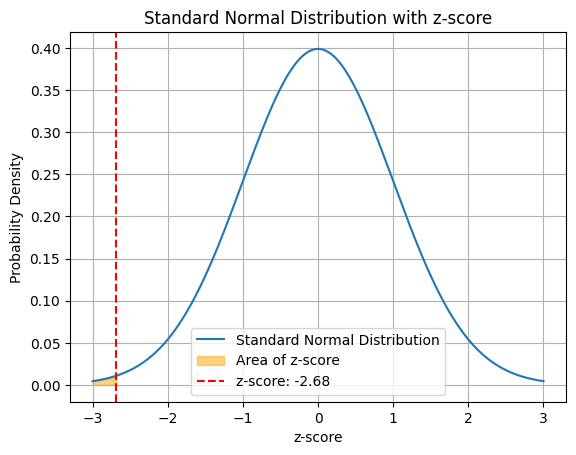

In [ ]:
# Plotting
plt.plot(np.linspace(-3, 3, 1000), stats.norm.pdf(np.linspace(-3, 3, 1000)), label='Standard Normal Distribution')
plt.fill_between(np.linspace(-3, z_score, 1000), stats.norm.pdf(np.linspace(-3, z_score, 1000)), color='orange', alpha=0.5, label='Area of z-score')
plt.axvline(z_score, color='red', linestyle='--', label=f'z-score: {z_score:.2f}')
plt.title('Standard Normal Distribution with z-score')
plt.xlabel('z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#Conclusion
Based on the one-sample z-test conducted with a significance level of 0.01, we reject the null hypothesis. This suggests strong evidence that the mean mileage of the new car differs significantly from the claimed value of 25 kmph.